In [ ]:
import tensorflow as tf
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_train[0].shape

(32, 32, 3)

## Data visualisation

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


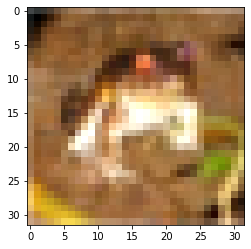

In [ ]:
# FROG
plt.imshow(x_train[0])

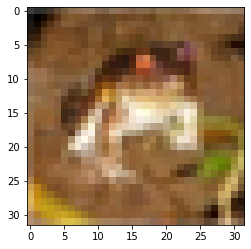

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

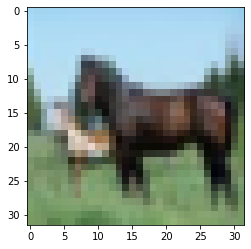

In [ ]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
print(x_train.max())
print(x_train.min())

255
0


In [ ]:
x_train = x_train/225
x_test=x_test/225

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

# labels

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
#normalisation
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [ ]:
y_cat_train.shape

(50000, 10)

In [ ]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
y_cat_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Building the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5202 - accuracy: 0.4550
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1650 - accuracy: 0.5937
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0116 - accuracy: 0.6470
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.9048 - accuracy: 0.6871
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8263 - accuracy: 0.7149
Epoch 6/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.7538 - accuracy: 0.7418
Epoch 7/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.6989 - accuracy: 0.7618
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6562 - accuracy: 0.7786
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6171 - accuracy: 0.7930
Epoch 10/10
1563/1563 [==============================] - 59s 37m

In [ ]:
# model.save('cifar_10epochs.h5')

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.1093 - accuracy: 0.6765


[1.1093342304229736, 0.6765000224113464]

# Predictions

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
predictions=np.argmax(model.predict(x_test), axis=-1)
#predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      1000
           1       0.86      0.74      0.80      1000
           2       0.67      0.49      0.57      1000
           3       0.59      0.34      0.43      1000
           4       0.58      0.67      0.63      1000
           5       0.55      0.64      0.59      1000
           6       0.65      0.85      0.74      1000
           7       0.72      0.76      0.74      1000
           8       0.79      0.76      0.77      1000
           9       0.65      0.85      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000

